# Space-charge limited current reporting statistics

In [1]:
# import paackages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
fsize = 20
plt.rc('font', size = fsize)
plt.rc('axes', linewidth=2, titlesize=fsize)     # fontsize of the axes title
plt.rc('axes', labelsize=fsize)    # fontsize of the x and y labels
plt.rc('xtick', top=True, bottom=True, direction='in')
plt.rc('ytick', left=True, right=True, direction='in') 
plt.rc('figure', titlesize=5)
plt.rc('legend', fontsize=fsize)
plt.rc('lines', linewidth=4)


In [2]:
# Import data
data = pd.read_csv('Statistic_literature/SCLC_reporting_standard.csv')

# Colors
colors= [sns.color_palette('muted')[3],sns.color_palette('muted')[2], sns.color_palette('muted')[7]]

# Set default font size
plt.rcParams.update({'font.size': 20})
# set default line thickness
plt.rcParams['lines.linewidth'] = 2

In [3]:
# replace
data['Ohmic slope'] = data['Ohmic slope'].replace(0, '$\\neq$1')
data['Ohmic slope'] = data['Ohmic slope'].replace(1, '$\sim$1')
data['SCLC slope'] = data['SCLC slope'].replace(np.NaN, 'N.A.')
data['SCLC slope'] = data['SCLC slope'].replace(0, '$\\neq$2')
data['SCLC slope'] = data['SCLC slope'].replace(1, '$\sim$2')
data['SCLC slope'] = data['SCLC slope'].replace(np.NaN, 'N.A.')
data['Position VTFL'] = data['Position VTFL'].replace(0, 'V$_{ons}$')
data['Position VTFL'] = data['Position VTFL'].replace(1, 'V$_{end}$')
data['Position VTFL'] = data['Position VTFL'].replace(np.NaN, 'N.A.')
data['Good µ'] = data['Good µ'].replace(0, 'Bad')
data['Good µ'] = data['Good µ'].replace(1, 'Good')
data['Good µ'] = data['Good µ'].replace(np.NaN, 'N.A.')
data['Measure (+)/(-) voltages'] = data['Measure (+)/(-) voltages'].replace(0, 'No')
data['Measure (+)/(-) voltages'] = data['Measure (+)/(-) voltages'].replace(1, 'Yes')
data['Measure (+)/(-) voltages'] = data['Measure (+)/(-) voltages'].replace(np.NaN, 'N.A.')
data['Hysteresis sweep'] = data['Hysteresis sweep'].replace(0, 'No')
data['Hysteresis sweep'] = data['Hysteresis sweep'].replace(1, 'Yes')
data['Hysteresis sweep'] = data['Hysteresis sweep'].replace(np.NaN, 'N.A.')

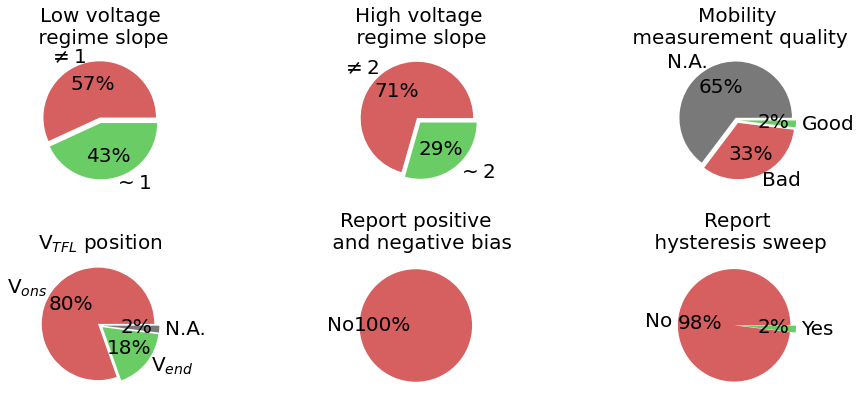

In [4]:
# put all together
fig = plt.figure(figsize=(14, 6))
colors= [sns.color_palette('muted')[3],sns.color_palette('muted')[2], sns.color_palette('muted')[7]]
gs = fig.add_gridspec(2, 3, wspace=0.05, hspace=0.0)
plt.subplot(2, 3, 1)
data['Ohmic slope'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.0f%%', shadow=False, colors=colors)
plt.ylabel('')
plt.title('Low voltage\n regime slope', loc='center')
plt.gca().set_facecolor('none') # set background color to transparent

plt.subplot(2, 3, 2)
data['SCLC slope'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.0f%%', shadow=False, colors=colors)
plt.ylabel('')
plt.title('High voltage\n regime slope', loc='center')
plt.gca().set_facecolor('none') # set background color to transparent

plt.subplot(2, 3, 3)
colors= [sns.color_palette('muted')[7],sns.color_palette('muted')[3], sns.color_palette('muted')[2]]
data['Good µ'].value_counts().plot.pie(explode=[0.05, 0.05, 0.05], autopct='%1.0f%%', shadow=False, colors=colors)
plt.ylabel('')
plt.title('Mobility\n measurement quality', loc='center')
plt.gca().set_facecolor('none') # set background color to transparent

colors= [sns.color_palette('muted')[3],sns.color_palette('muted')[2], sns.color_palette('muted')[7]]
plt.subplot(2, 3, 4)
data['Position VTFL'].value_counts().plot.pie(explode=[0.05, 0.05, 0.05], autopct='%1.0f%%', shadow=False, colors=colors)
plt.ylabel('')
plt.title('V$_{TFL}$ position', loc='center')
plt.gca().set_facecolor('none') # set background color to transparent

plt.subplot(2, 3, 5)
data['Measure (+)/(-) voltages'].value_counts().plot.pie(explode=[0.05], autopct='%1.0f%%', shadow=False, colors=colors)
plt.ylabel('')
plt.title('Report positive \n and negative bias', loc='center')
plt.gca().set_facecolor('none') # set background color to transparent

plt.subplot(2, 3, 6)
data['Hysteresis sweep'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.0f%%', shadow=False, colors=colors)
plt.ylabel('')
plt.title('Report\n hysteresis sweep', loc='center')
plt.gca().set_facecolor('none') # set background color to transparent

plt.tight_layout()
plt.savefig('Statistic_literature/All_pies.pdf', dpi=300, format='pdf', bbox_inches='tight')
plt.show()